<a href="https://colab.research.google.com/github/subhajitmahapatra92da7ds/startup-Case-Study/blob/Startup-case-study-1st-part/Case_Study_1(1st)_Startup_Dataset(Assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset has funding information of the Indian startups from January 2015 to August 2017.

Feature Details :

 * SNo - Serial number.
 * Date - Date of funding in format DD/MM/YYYY.
 * StartupName - Name of the startup which got funded.
 * IndustryVertical - Industry to which the startup belongs.
 * SubVertical - Sub-category of the industry type.
 * CityLocation - City which the startup is based out of.
 * InvestorsName - Name of the investors involved in the funding round.
 * InvestmentType - Either Private Equity or Seed Funding.
 * AmountInUSD - Funding Amount in USD.
 * Remarks - Other information, if any.







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset

In [ ]:
start_up = pd.read_csv('/content/startup_funding.csv')
start_up

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [ ]:
# Make a copy of the Original dataet and use this copied dtaset for case study, so it's not effect the original dataset.
df = start_up.copy()

In [ ]:
# Exploring a brife information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [ ]:
# Checking how many nullvalues are present in every feature of the dataset
print(df.isnull().sum()) # total number of nullvalues of every feature
print('*'*100)
print(df.isnull().sum()/len(df)) # looking for percentage of nullvalues.

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64
****************************************************************************************************
Sr No                0.000000
Date dd/mm/yyyy      0.000000
Startup Name         0.000000
Industry Vertical    0.056176
SubVertical          0.307490
City  Location       0.059133
Investors Name       0.007884
InvestmentnType      0.001314
Amount in USD        0.315375
Remarks              0.862352
dtype: float64


In [ ]:
# Checking how many unique values are present in some
print('Startup Name - ',df['Startup Name'].nunique())
print('Industry Vertical - ',df['Industry Vertical'].nunique())
print('SubVertical - ',df['SubVertical'].nunique())
print('City  Location - ',df['City  Location'].nunique())
print('Investors Name - ',df['Investors Name'].nunique())
print('InvestmentnType - ',df['InvestmentnType'].nunique())

Startup Name -  2459
Industry Vertical -  821
SubVertical -  1942
City  Location -  112
Investors Name -  2412
InvestmentnType -  55


 * At first we convert **'Date dd/mm/yyyy'** column from 'Object' datatype to datetime64[ns] datatype but facing some issues that some elements are not support the datetime64[ns] format.    
 So lets Solve this issues one by one.

In [ ]:
#  1st issue raise.
# df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'],format = '%d/%m/%Y')

In [ ]:
#solve this issue by replacing correct format in the place of unsupported format.
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].str.replace('05/072018','05/07/2018')

In [ ]:
# 2nd issue raise.
# df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'],format = '%d/%m/%Y')

In [ ]:
#solve this issue by replacing correct format in the place of unsupported format.
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].str.replace('01/07/015','01/07/2015')

In [ ]:
# 3rd issue raise.
# df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'],format = '%d/%m/%Y')

In [ ]:
#solve this issue by replacing correct format in the place of unsupported format.
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].str.replace('\\', '',regex=True)
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].str.replace('xc2xa0', '',regex=True)

In [ ]:
# 4th issue raise.
# df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'],format = '%d/%m/%Y')

In [ ]:
#solve this issue by replacing correct format in the place of unsupported format.
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].str.replace('12/05.2015','12/05/2015',regex=True)

In [ ]:
# 5th issue raise.
# df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'],format = '%d/%m/%Y')

In [ ]:
#solve this issue by replacing correct format in the place of unsupported format.
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].str.replace('13/04.2015','13/04/2015',regex=True)

In [ ]:
# 6th issue raise.
# df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'],format = '%d/%m/%Y')

In [ ]:
#solve this issue by replacing correct format in the place of unsupported format.
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].str.replace('15/01.2015','15/01/2015',regex=True)

In [ ]:
# 7th issue raise.
# df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'],format = '%d/%m/%Y')

In [ ]:
#solve this issue by replacing correct format in the place of unsupported format.
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].str.replace('22/01//2015','22/01/2015',regex=True)

In [ ]:
# After removing all the format error, conver 'Date dd/mm/yyyy' column from 'Object' datatype to 'datetime64[ns]' datatype
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'],format = '%d/%m/%Y')

In [ ]:
# Check datatype of every column for data cleaning and formating
df.dtypes

Sr No                         int64
Date dd/mm/yyyy      datetime64[ns]
Startup Name                 object
Industry Vertical            object
SubVertical                  object
City  Location               object
Investors Name               object
InvestmentnType              object
Amount in USD                object
Remarks                      object
dtype: object

In [ ]:
# Split 'Date dd/mm/yyyy' column into three column named  'Day' , 'Month' , 'Year' and column named "Date dd/mm/yyyy" is changed to "Date" for simplicity purpose. Print DataFrame for view the result
df['Day'] = df['Date dd/mm/yyyy'].dt.day
df['Month'] = df['Date dd/mm/yyyy'].dt.month
df['Year'] = df['Date dd/mm/yyyy'].dt.year
df.rename(columns = {'Date dd/mm/yyyy' : 'Date'},inplace=True)
df.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Day,Month,Year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,9,1,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,13,1,2020
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN,9,1,2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN,2,1,2020
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN,2,1,2020


In [ ]:
# checking how many nullvalues are there
df.isnull().sum()

Sr No                   0
Date                    0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
Day                     0
Month                   0
Year                    0
dtype: int64

In [ ]:
# 'Amount in USD' column is not in correct datatype. It's present as a 'Object'. So I convert this into 'Float' datatype. but here we face some issues for
# wrong formatng,some of the positions have values which cannot be converted to numerical data, so I replace these incorrect things.
df['Amount in USD'] = df['Amount in USD'].str.replace('\\', '',regex=True)
df['Amount in USD'] = df['Amount in USD'].str.replace('xc2xa0', '',regex=True)
df['Amount in USD'] = df['Amount in USD'].str.replace('N/A', '0')
df['Amount in USD'] = df['Amount in USD'].str.replace(',', '')
df['Amount in USD'] = df['Amount in USD'].str.replace('unknown', '0')
df['Amount in USD'] = df['Amount in USD'].str.replace('undisclosed', '0')
df['Amount in USD'] = df['Amount in USD'].str.replace('Undisclosed', '0')
df['Amount in USD'] = df['Amount in USD'].str.rstrip('+')

In [ ]:
# After solving these issues I converted  'Amount in USD' column into 'float datatype and fill nullvalues with '0'.Which is not creat probelm for any
# numerical operation on these column and didn't affect calculation . and do checking for nullvalue and datatype
df['Amount in USD'] = df['Amount in USD'].astype(float).fillna(0)
print("For 'Amount in USD' Number of nullvalues - ",df['Amount in USD'].isnull().sum())
print("For 'Amount in USD'Datatype is - ",df['Amount in USD'].dtypes)

For 'Amount in USD' Number of nullvalues -  0
For 'Amount in USD'Datatype is -  float64


In [ ]:
## In 'Industry Vertical' column some of the positions have values which cannot be converted to umerical data,so I replace these incorrect things.
df['Industry Vertical'] = df['Industry Vertical'].str.replace('\\', '',regex=True)
df['Industry Vertical'] = df['Industry Vertical'].str.replace('xc2xa0', '',regex=True)

In [ ]:
## In 'SubVertical' column some of the positions have values which cannot be converted to umerical data,so I replace these incorrect things.
df['SubVertical'] = df['SubVertical'].str.replace('\\', '',regex=True)
df['SubVertical'] = df['SubVertical'].str.replace('xc2xa0', '',regex=True)

In [ ]:
## In 'City  Location' column some of the positions have values which cannot be converted to umerical data,so I replace these incorrect things.
df['City  Location'] = df['City  Location'].str.replace('\\', '',regex=True)
df['City  Location'] = df['City  Location'].str.replace('xc2xa0', '',regex=True)

In [ ]:
## In 'Investors Name' column some of the positions have values which cannot be converted to umerical data,so I replace these incorrect things.
df['Investors Name'] = df['Investors Name'].str.replace('\\', '',regex=True)
df['Investors Name'] = df['Investors Name'].str.replace('xc2xa0', '',regex=True)

In [ ]:
## In 'InvestmentnType' column some of the positions have values which cannot be converted to umerical data,so I replace these incorrect things.
df['InvestmentnType'] = df['InvestmentnType'].str.replace('\\', '',regex=True)
df['InvestmentnType'] = df['InvestmentnType'].str.replace('xc2xa0', '',regex=True)

 * Fill 'Unknown' keyword for 'SubVertical' columns and drop some row of some columns which contain nullvalues .It will not have any major impact on our casestudy but presence of null values creat problem for study

In [ ]:
df = df.dropna(subset='City  Location') # drop some row of 'City  Location' columns which contain nullvalues

In [ ]:
df = df.dropna(subset='InvestmentnType') # drop some row of 'InvestmentnType'' columns which contain nullvalues

In [ ]:
df = df.dropna(subset='Investors Name') # drop some row of 'Investors Name' columns which contain nullvalues

In [ ]:
df['SubVertical'] = df['SubVertical'].fillna('Unknown') #Fill 'Unknown' keyword for 'SubVertical' columns

In [ ]:
# final checking for null value and datatypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2836 entries, 0 to 2872
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              2836 non-null   int64         
 1   Date               2836 non-null   datetime64[ns]
 2   Startup Name       2836 non-null   object        
 3   Industry Vertical  2836 non-null   object        
 4   SubVertical        2836 non-null   object        
 5   City  Location     2836 non-null   object        
 6   Investors Name     2836 non-null   object        
 7   InvestmentnType    2836 non-null   object        
 8   Amount in USD      2836 non-null   float64       
 9   Remarks            348 non-null    object        
 10  Day                2836 non-null   int64         
 11  Month              2836 non-null   int64         
 12  Year               2836 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory us

In [ ]:
# Drop 'Remarks' column, since it is not play any mejor role for our case study but it' is contain more than 80% null values.
df = df.drop('Remarks',axis=1)

In [ ]:
# View some sample data
df.sample(10)

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Day,Month,Year
2355,2356,2015-10-23,Leaping Caravan,Online food ordering & Delivery service,Unknown,Gurgaon,Group of Angel investors,Seed Funding,150000.0,23,10,2015
2687,2688,2015-06-04,Vidooly,Video Intelligence Platform,Unknown,Noida,Bessemer Venture Partners,Private Equity,1000000.0,4,6,2015
2287,2288,2015-11-30,Butterfly Interactive,extra curricular activities marketplace app,Unknown,New Delhi,Undisclosed investors,Seed Funding,0.0,30,11,2015
323,324,2018-03-05,Hotelogix,Technology,Cloud based Online Hotel Management Software,Noida,"Vertex Ventures, Accel Partners and Saama Capital",Private Equity,5000000.0,5,3,2018
1923,1924,2016-02-05,DawaiLelo,Consumer Internet,Healthcare Services & Online Pharmacy Mobile App,Varanasi,Undisclosed investors,Seed Funding,52000.0,5,2,2016
2522,2523,2015-08-14,Trukky,Logistics service platform,Unknown,Ahmedabad,"Gujarat based angel investors, MMY co-Founder",Seed Funding,245000.0,14,8,2015
2187,2188,2015-12-23,Shotang.com,B2B eCommerce Marketplace,Unknown,Bangalore,"Exfinity Venture Partners, Unitus Impact Livel...",Private Equity,5000000.0,23,12,2015
33,34,2019-10-02,Udaan,B2B,Business development,Bengaluru,"Altimeter Capital, DST Global",Series D,585000000.0,2,10,2019
1455,1456,2016-08-17,Pikkol,Logistics,Packers & Movers,Bangalore,Indian Angel Network,Seed Funding,0.0,17,8,2016
1122,1123,2016-12-05,UrDoorStep,eCommerce,Online Grocery Store,Bangalore,Lakshmi Vilas Bank & undisclosed HNIs,Private Equity,1400000.0,5,12,2016


# **Insights -**


**Find out what type of startups are getting funded in the last few years?**



In [ ]:
df['Year'].unique() # check how many unique value present in "Year column"

array([2020, 2019, 2018, 2017, 2016, 2015])

In [ ]:
last_few_years = df[df['Year'].isin([2020, 2019,2018])] # filtering last few years data and make a  different DataFrame
top10 = last_few_years['Industry Vertical'].value_counts().head(10).index.tolist() # Find out top 10 startups name from this newly created dataframe
#print top 10  Startup name which are getting funded in the last few years
top10

['Consumer Internet',
 'Technology',
 'Finance',
 'Healthcare',
 'E-Commerce',
 'E-commerce',
 'Ed-Tech',
 'FinTech',
 'IT',
 'Fin-Tech']

In [ ]:
last_few_years_top10 = last_few_years[last_few_years['Industry Vertical'].isin(top10)] # using this top 10 startups name I use fillering and make a dataframe
last_few_years_top10

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Day,Month,Year
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,9,1,2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2,1,2020
7,8,2019-12-12,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,6000000.0,12,12,2019
8,9,2019-12-06,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,70000000.0,6,12,2019
10,11,2019-12-13,Rivigo,Technology,Logistics Services and Solutions,Gurgaon,"SAIF Partners, Spring Canter Investment Ltd.",Series F,20000000.0,13,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
423,424,2018-01-30,BrowserStack,Technology,Browser Testing,Mumbai,Accel Partners,Private Equity,50000000.0,30,1,2018
424,425,2018-01-30,Scapic,Technology,Virtual Reality,Bengaluru,"Axilor Ventures, Newfort Capital",Angel / Seed Funding,500000.0,30,1,2018
425,426,2018-01-30,MoneyOnMobile,Technology,Mobile Payment Platform,Mumbai,Undisclosed Investors,Private Equity,7600000.0,30,1,2018
426,427,2018-01-30,CureFit,Healthcare,Fitness,Bengaluru,"HDFC Bank, Axis Bank",Debt Funding,10000000.0,30,1,2018


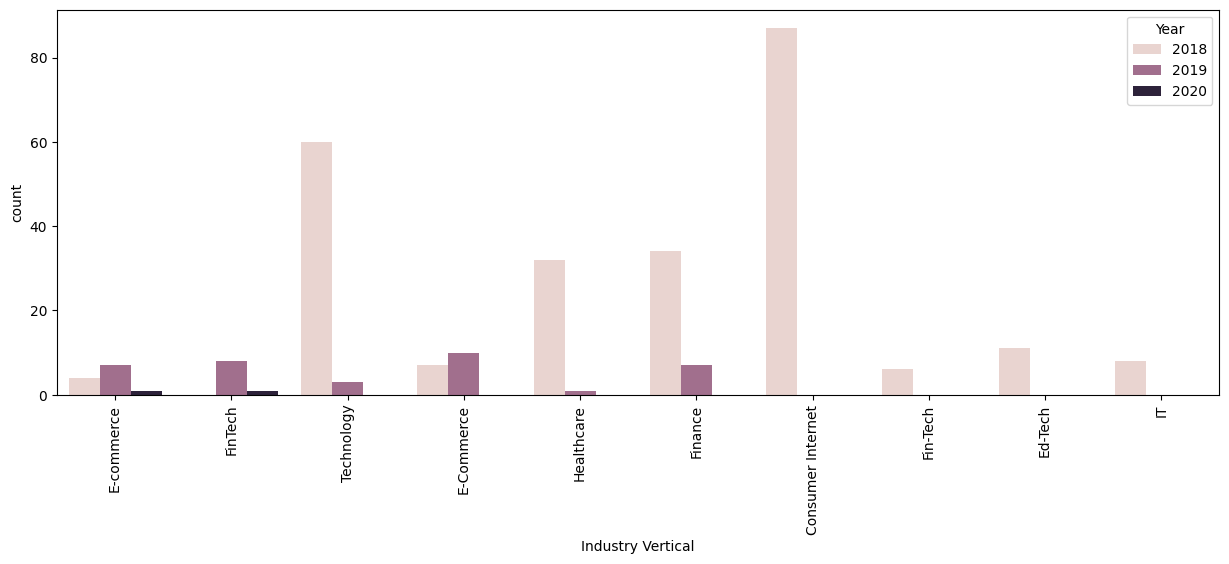

In [ ]:
# Vizualize this thing for better represtation and understading with the help of matpltlib and seaborn
plt.figure(figsize=(15,5))
sns.countplot(data=last_few_years_top10, x ='Industry Vertical' , hue='Year')
plt.xticks(rotation=90)
plt.show()

**Who are the important investors?**

In [ ]:
last_few_years[last_few_years['Investors Name'] == 'Trifecta Capital']

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Day,Month,Year
328,329,2018-03-08,Magicpin,Consumer Internet,Hyperlocal Discovery,Gurugram,Trifecta Capital,Debt Funding,1000000.0,8,3,2018
366,367,2018-02-12,Cashify,E-Commerce,Online Selling,Gurugram,Trifecta Capital,Debt Funding,935089.0,12,2,2018


In [ ]:
#In order to know who are the important investors, whose frquency of funding is more then the other investors in last few years (2018-2020)

last_few_years['Investors Name'].value_counts().head(11)   ## Find out top 10 investors name, who play an important role

Tiger Global Management                                  4
Alteria Capital                                          3
SoftBank Vision Fund                                     2
March Capital Partners                                   2
Undisclosed                                              2
Naspers                                                  2
Ventureast                                               2
Blume Ventures                                           2
Endiya Partners                                          2
Sunil Munjal, Harsh Mariwala, Dalip Pathak and Others    2
Nexus Venture Partners                                   2
Name: Investors Name, dtype: int64

In [ ]:
topinv = last_few_years['Investors Name'].value_counts().head(10).index.tolist() ## Find out top 10 investors name, who play an important role
newdf = last_few_years[last_few_years['Investors Name'].isin(topinv)]  # using this top 10 Investors  name I use fillering and make a dataframe
newdf

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Day,Month,Year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,9,1,2020
16,17,2019-12-20,Lenskart.com,E-Commerce,Online Eyewear Shopping Portal,Faridabad,SoftBank Vision Fund,Series G,231000000.0,20,12,2019
40,41,2019-09-04,Myelin Foundry,Information Technology,Deep-technology,Bengaluru,Endiya Partners,Seed,1000000.0,4,9,2019
49,50,2019-08-12,Meesho,E-Commerce,Social Commerce,Bengaluru,Naspers,Series D,125000000.0,12,8,2019
51,52,2019-08-13,Uniphore,Customer Service Platform,Conversational AI,Palo Alto,March Capital Partners,Series C,51000000.0,13,8,2019
55,56,2019-08-22,INDwealth,FinTech,Wealth Management,Gurgaon,Tiger Global Management,Venture Round,15000000.0,22,8,2019
65,66,2019-07-01,Uniphore,Artificial Intelligence,Speech Recognition,Taramani,March Capital Partners,Series C,38080000.0,1,7,2019
69,70,2019-07-10,Ezyhaul,Tech,Logistics,Singapore,Undisclosed,Series B,16000000.0,10,7,2019
70,71,2019-07-10,Indus OS,Tech,Smartphone Operating System,Andheri,Ventureast,Series B,5750000.0,10,7,2019
71,72,2019-07-10,HealthAssure,Health Care,Primary care medical network,Mumbai,Blume Ventures,Series A,2500000.0,10,7,2019


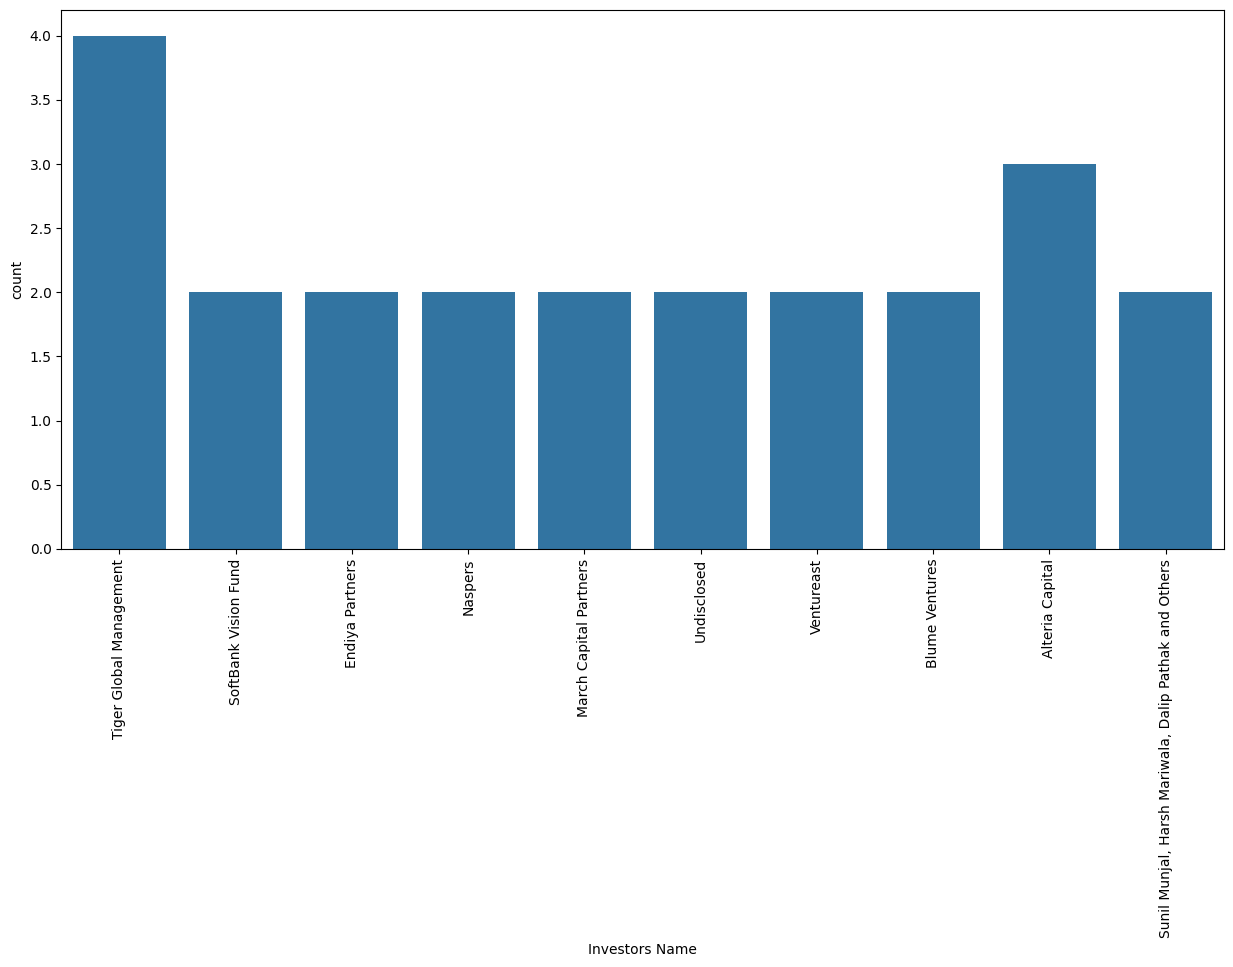

In [ ]:
# Vizualize this thing for better represtation and understading with the help of matpltlib and seaborn
plt.figure(figsize=(15,7))
sns.countplot(data=newdf, x ='Investors Name')
plt.xticks(rotation=90)
plt.show()

**What are the hot fields that get a lot of funding these days?**

In [ ]:
# To find the hot fields that get a lot of funding these days I use groupby on 'Industry Vertical' and aggregation function on 'Amount in USD' and
# find top 10 field on the base of how much amount is fundded in these field.
hot_field = df.groupby('Industry Vertical').agg({'Amount in USD' : 'sum'}).reset_index().sort_values(by = 'Amount in USD',ascending=False).head(10)
hot_field

,Industry Vertical,Amount in USD
112,Consumer Internet,6.248892e+09
775,eCommerce,5.002533e+09
726,Transportation,3.916632e+09
722,Technology,2.229458e+09
175,ECommerce,1.878798e+09
238,Finance,1.364388e+09
236,FinTech,1.220711e+09
170,E-Commerce,1.000520e+09
533,Online Marketplace,7.001430e+08
171,E-Commerce & M-Commerce platform,6.800000e+08


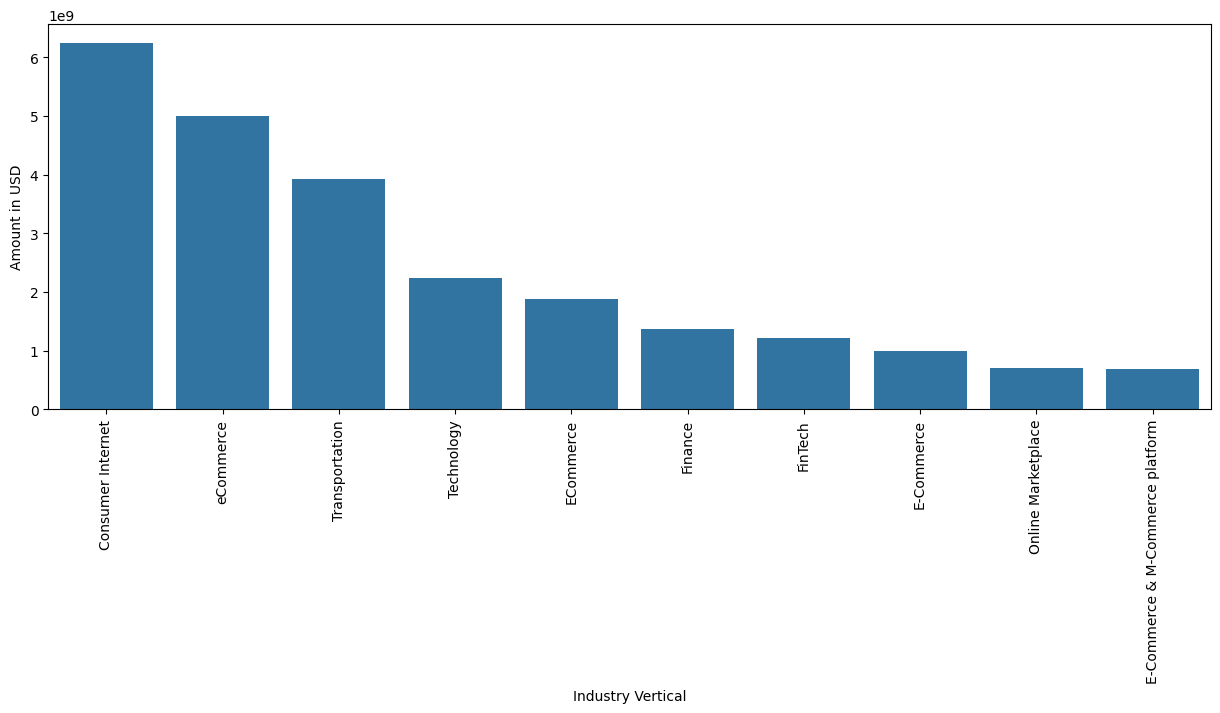

In [ ]:
# Vizualize this thing for better represtation and understading with the help of matpltlib and seaborn
plt.figure(figsize=(15,5))
sns.barplot(data=hot_field, x ='Industry Vertical' , y = 'Amount in USD')
plt.xticks(rotation=90)
plt.show()

# **Questions :-**

In [ ]:
df.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Day,Month,Year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,9,1,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,13,1,2020
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,9,1,2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2,1,2020
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,2,1,2020


***
***
**Problem Statement 1:**
***

 * Check the trend of investments over the years. To check the trend, find -
Total number of fundings done in each year.
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
 * Print year-wise total number of fundings also. Print years in ascending order.
Note :
There is some error in the 'Date' feature. Make sure to handle that.

Output Format :
 * year1 TotalFunding1
 * year2 TotalFunding2
 ***
 ***

In [ ]:
trend_by_year = df.groupby('Year').size().reset_index(name='Number of fundings')
trend_by_year

,Year,Number of fundings
0,2015,756
1,2016,987
2,2017,684
3,2018,296
4,2019,106
5,2020,7


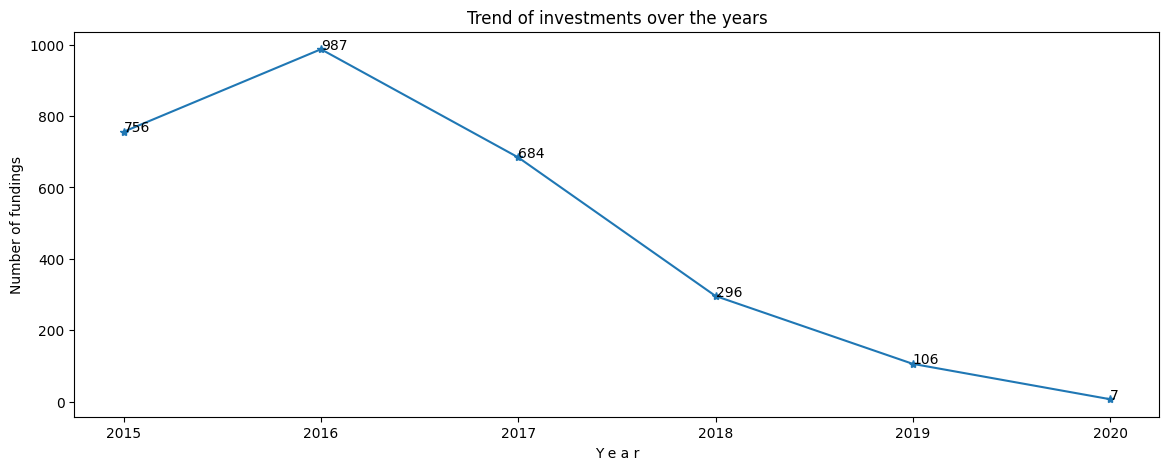

In [ ]:
#Check the trend of investments over the years

#Find the number of funding for each year.Change the column-name of the counting column as 'Number of fundings' when use reset_index and creat a new dataframe.
trend_by_year = df.groupby('Year').size().reset_index(name='Number of fundings')

# change Datatype of Year named column only for this dataframe for ploting
trend_by_year['Year'] = trend_by_year['Year'].astype(str)

# Vizualize this things plot a line graph using Matplotlib and seaborn
plt.figure(figsize=(14,5))
plt.plot(trend_by_year['Year'],trend_by_year['Number of fundings'],marker = '*')

# give annotatation for better understanding
x = np.array(trend_by_year['Year'])
y = np.array(trend_by_year['Number of fundings'])
for index,value in zip(x,y):
  plt.annotate(value , (index,value) , ha = 'left')

# give detaling in the graph
plt.title('Trend of investments over the years')
plt.xlabel('Y e a r')
plt.ylabel('Number of fundings')
plt.show()

***

In [ ]:
# Year-wise total number of fundings with years in ascending order.

trend_by_year

,Year,Number of fundings
0,2015,756
1,2016,987
2,2017,684
3,2018,296
4,2019,106
5,2020,7


***
***
**Problem Statement 2:**
***
 * Find out which cities are generally chosen for starting a startup.
 * Find top 10 Indian cities which have most number of startups ?
 * Plot a pie chart and visualise it.
 * Print the city name and number of startups in that city also.

**Note :**

 * Take city name "Delhi" as "New Delhi".
 * Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
 * For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
 * Print the city in descending order with respect to the number of startups.
 ***
 ***

In [ ]:
df['City  Location'].unique() # For finding errors in 'City  Location' name

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Hyderabad', 'Burnsville', 'Menlo Park',
       'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore', 'Taramani',
       'Andheri', 'Chembur', 'Haryana', 'New York', 'Karnataka',
       'Mumbai/Bengaluru', 'Bhopal', 'Bengaluru and Gurugram',
       'India/Singapore', 'Jaipur', 'India/US', 'Nagpur', 'Indore',
       'New York, Bengaluru', 'California', 'India', 'Rourkela',
       'Srinagar', 'Bhubneswar', 'Chandigarh', 'Delhi & Cambridge',
       'Kolkatta', 'Kolkata', 'Coimbatore', 'Bangalore', 'Udaipur',
       'Ahemdabad', 'Bhubaneswar', 'Ahmedabad', 'Ahemadabad', 'Surat',
       'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya', 'Vadodara',
       'Trivandrum', 'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi',
       'Kochi', 'Agra', 'Bangalore/ Bangkok', 'Hubli', 'Kerala',
       'Kozhikode', 'US', 'Siliguri', 'USA'

In [ ]:
#For few startups multiple locations are given, one Indian and one Foreign.
#therefore taking  those startups in Indian startup also.
#In most of the cases Indian city names are at first position, so taking only first position.

df['City  Location'] = df['City  Location'].apply(lambda x : x.split('/')[0] if '/' in x else x)

In [ ]:
#Cleaning the data in "City  Location" column
#correcting the values which are indicating the same cities but have variation in spellings and are case sensitive
#and also correcting the values which are not in proper string format.

df['City  Location'] = df['City  Location'].replace('Delhi', 'New Delhi')
df['City  Location'] = df['City  Location'].replace('Bengaluru', 'Bangalore')
df['City  Location'] = df['City  Location'].replace('Gurugram', 'Gurgaon')
df['City  Location'] = df['City  Location'].replace('New York, Bengaluru', 'Bangalore')
df['City  Location'] = df['City  Location'].replace('Delhi & Cambridge', 'New Delhi')
df['City  Location'] = df['City  Location'].replace('Kolkatta', 'Kolkata')
df['City  Location'] = df['City  Location'].replace('Ahemadabad', 'Ahmedabad')
df['City  Location'] = df['City  Location'].replace('Ahemdabad', 'Ahmedabad')
df['City  Location'] = df['City  Location'].replace('Bhubaneswar', 'Bhubneswar')
df['City  Location'] = df['City  Location'].replace('Nw Delhi', 'New Delhi')

In [ ]:
## 1. Find out which cities are generally chosen for starting a startup

cities_df = df['City  Location'].value_counts().reset_index().head(15) # find top 15 for find out which cities are generally chosen for starting a startup
cities_df.columns = ['City  Location','No_of_startups'] # change the column names
cities_df['City  Location'].tolist() #print these cities names

['Bangalore',
 'Mumbai',
 'New Delhi',
 'Gurgaon',
 'Pune',
 'Hyderabad',
 'Chennai',
 'Noida',
 'Ahmedabad',
 'Jaipur',
 'Kolkata',
 'Indore',
 'Goa',
 'Chandigarh',
 'Vadodara']

 * From the above list we can see that Indian cities like **'Bangalore','Mumbai','New Delhi','Gurgaon','Pune','Hyderabad','Chennai','Noida','Ahmedabad','Jaipur','Kolkata','Indore','Chandigarh','Goa','Vadodara'**,ect  are chosen for starting a startup

***

In [ ]:
## 2. Find top 10 Indian cities which have most number of startups ?

# Find top 10 cities and change the column-name of the counting column as 'No of startup' when use reset_index and creat a new dataframe.
top_10_cities = df.groupby('City  Location')['Startup Name'].count().sort_values(ascending=False).reset_index(name='No of startup').head(10)
top_10_cities['City  Location'].tolist()

['Bangalore',
 'Mumbai',
 'New Delhi',
 'Gurgaon',
 'Pune',
 'Hyderabad',
 'Chennai',
 'Noida',
 'Ahmedabad',
 'Jaipur']

***

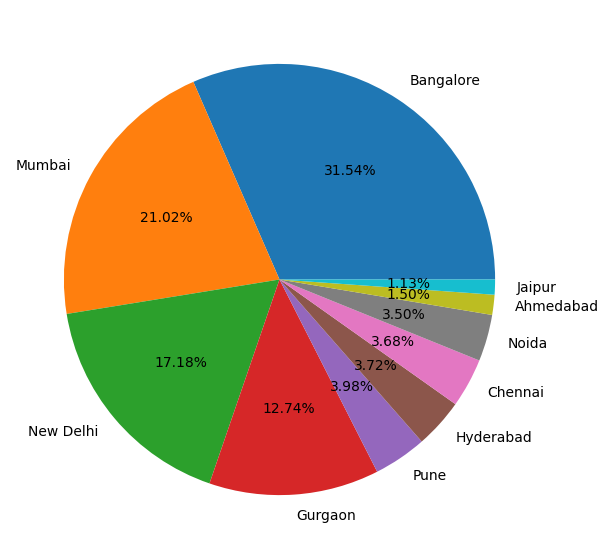

In [ ]:
# Plot a pie chart and visualise it.

plt.figure(figsize=(7,7))
plt.pie(top_10_cities['No of startup'], labels = top_10_cities['City  Location'] , autopct='%0.2f%%')
plt.show()

In [ ]:
# Print the city name and number of startups in that city also.

df['City  Location'].value_counts()

Bangalore    839
Mumbai       559
New Delhi    457
Gurgaon      339
Pune         106
            ... 
Andheri        1
Taramani       1
Hubli          1
Kerala         1
India          1
Name: City  Location, Length: 74, dtype: int64

***
***
**Problem Statement 3:**
***
 * Find out if cities play any role in receiving funding.
 * Find top 10 Indian cities with most amount of fundings received.
 * Find out percentage of funding each city has got (among top 10 Indian cities only).
 * Print the city and percentage with 2 decimal place after rounding off.

**Note:**

 * Take city name "Delhi" as "New Delhi".
 * Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
 * For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
 * Print the city in descending order with respect to the percentage of funding.

**Output Format :**
 * city1 percent1
 * city2 percent2
 * city3 percent3
 ***
 ***

In [ ]:
# Find out if cities play any role in receiving funding.

#Perform count function on 'Startup Name' to find how many startup recieve bt each city and fin sum of amound for each city fundded and make a new dataframe.
amountfunding_topcities = df.groupby('City  Location').agg({'Startup Name' : 'count' , 'Amount in USD' : 'sum'}).sort_values(by= 'Startup Name',ascending=False).reset_index().head(5)

#change the column name from 'Startup Name' to 'Start_up count'.
amountfunding_topcities.rename(columns = {'Startup Name' : 'Start_up count'},inplace=True)


cities = amountfunding_topcities['City  Location']
amounts = amountfunding_topcities['Amount in USD']
noofstartup = amountfunding_topcities['Start_up count']

#print this dataframe
print(amountfunding_topcities)
print()
for city,usd,count in zip(cities,amounts,noofstartup):
  print(f"{city} recieve {count} startup and get funding {usd} usd for total.\n")


  City  Location  Start_up count  Amount in USD
0      Bangalore             839   1.849521e+10
1         Mumbai             559   4.334740e+09
2      New Delhi             457   3.299875e+09
3        Gurgaon             339   3.872024e+09
4           Pune             106   6.480820e+08

Bangalore recieve 839 startup and get funding 18495208863.0 usd for total.

Mumbai recieve 559 startup and get funding 4334740015.0 usd for total.

New Delhi recieve 457 startup and get funding 3299875375.0 usd for total.

Gurgaon recieve 339 startup and get funding 3872023682.0 usd for total.

Pune recieve 106 startup and get funding 648082000.0 usd for total.



From above we can see that most of the startups belongs to indian cities like - **'Bangalore' , 'Mumbai' , 'New Delhi' , 'Gurgaon' , 'Pune'** . Therefore it can be said that starting a Statrtup from these cities can play some role in reciving funding based on Physicological parameters

***

In [ ]:
# Find top 10 Indian cities with most amount of fundings received. .

#1st find top 13 cities with most amount of fundings received and change the column name from 'Amount in USD' to Total(USD)'.
top_funddedCity = df.groupby('City  Location')['Amount in USD'].sum().nlargest(13).reset_index(name = 'Total(USD)')

top10_funddedCity = top_funddedCity.drop([9,10,11],axis=0) # drop some rows for appropiate result

top10_funddedCity.index = list(range(1,11)) # change index values.

top10_funddedCity

,City Location,Total(USD)
1,Bangalore,1.849521e+10
2,Mumbai,4.334740e+09
3,Gurgaon,3.872024e+09
4,New Delhi,3.299875e+09
5,Noida,1.282864e+09
6,Chennai,7.187670e+08
7,Pune,6.480820e+08
8,Menlo Park,4.500000e+08
9,Hyderabad,4.016762e+08
10,Faridabad,2.520000e+08


***

In [ ]:
# Find out percentage of funding each city has got (among top 10 Indian cities only)

top10_funddedCity_df1 = top10_funddedCity.copy() # make a copy of present dataframe
total_amount = df['Amount in USD'].sum() # find total amount invested on all of these startup
top10_funddedCity_df1['Total(USD)'] = (top10_funddedCity_df1['Total(USD)'].astype(int)) # change the datatype of 'Total(USD)' into 'int'
top10_funddedCity_df1['Total(USD)'] = (top10_funddedCity_df1['Total(USD)']/total_amount)*100 # Find the percentage value.
top10_funddedCity_df1.rename(columns = {'Total(USD)' : 'Percentage(%)'},inplace=True) # change column name from 'Total(USD)' to 'Percentage(%)'
top10_funddedCity_df1

,City Location,Percentage(%)
1,Bangalore,51.318110
2,Mumbai,12.027475
3,Gurgaon,10.743590
4,New Delhi,9.156067
5,Noida,3.559525
6,Chennai,1.994342
7,Pune,1.798214
8,Menlo Park,1.248602
9,Hyderabad,1.114519
10,Faridabad,0.699217


***

In [ ]:
# Print the city and percentage with 2 decimal place after rounding off.

top10_funddedCity_df2 = top10_funddedCity.copy() # make a copy of present dataframe
total_amount = df['Amount in USD'].sum() # find total amount invested on all of these startup
top10_funddedCity_df2['Total(USD)'] = (top10_funddedCity_df2['Total(USD)'].astype(int)) # change the datatype of 'Total(USD)' into 'int'
top10_funddedCity_df2['Total(USD)'] = (top10_funddedCity_df2['Total(USD)']/total_amount)*100 # Find the percentage value.
top10_funddedCity_df2.rename(columns = {'Total(USD)' : 'Percentage(%)'},inplace=True) # change column name from 'Total(USD)' to 'Percentage(%)'
top10_funddedCity_df2

,City Location,Percentage(%)
1,Bangalore,51.318110
2,Mumbai,12.027475
3,Gurgaon,10.743590
4,New Delhi,9.156067
5,Noida,3.559525
6,Chennai,1.994342
7,Pune,1.798214
8,Menlo Park,1.248602
9,Hyderabad,1.114519
10,Faridabad,0.699217


***
***
**Problem Statement 4:**
***

 * There are 4 different type of investments. Find out percentage of amount funded for each investment type.
 * Plot a pie chart to visualise.
 * Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

**Note :**

 * Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
 * Print the investment type in descending order with respect to the percentage of the amount funded.

**Output Format :**

 * investmentType1 percent1
 * investmentType2 percent2
 * investmentType3 percent3
 ***
 ***

In [ ]:
#  Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake.

#Cleaning the data by using lambda function
df['InvestmentnType'] =df['InvestmentnType'].apply(lambda x : "Private Equity" if 'Privet' in x
                                                                  else  "Seed Funding" if 'Seed' in x
                                                                  else  "Debt Funding" if 'Debt' in x
                                                                  else  "Private Equity" if 'Equity' in x
                                                                  else "Crowd Funding")
df['InvestmentnType'].unique()


array(['Private Equity', 'Crowd Funding', 'Seed Funding', 'Debt Funding'],
      dtype=object)

In [ ]:
# There are 4 different type of investments. Find out percentage of amount funded for each investment type

temp_df = df.groupby('InvestmentnType')['Amount in USD'].sum().reset_index()
temp_df['Amount in USD'] = ((temp_df['Amount in USD']/df['Amount in USD'].sum())*100).round(2) # find percentage
temp_df = temp_df.rename(columns = {'Amount in USD' : 'Prct(%)of funding'}) # change the column name from 'Amount in USD' to 'Prct(%)of funding'
temp_df

,InvestmentnType,Prct(%)of funding
0,Crowd Funding,25.88
1,Debt Funding,0.49
2,Private Equity,70.83
3,Seed Funding,2.80


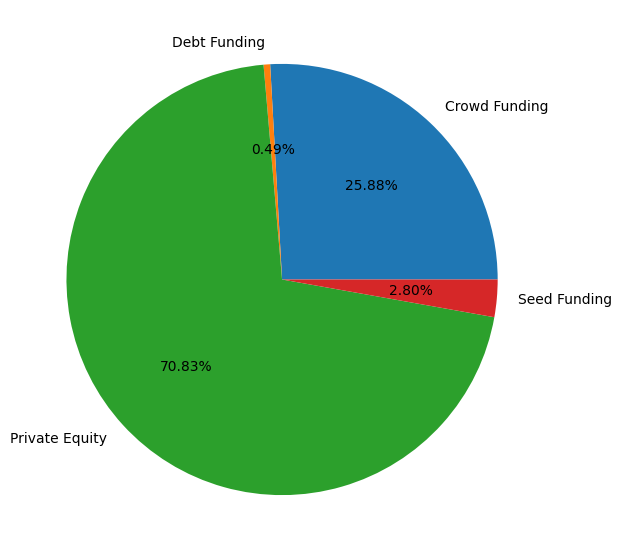

In [ ]:
# Plot a pie chart to visualize.

plt.figure(figsize=(7,7))
plt.pie(temp_df['Prct(%)of funding'] , labels = temp_df['InvestmentnType'] , autopct='%0.2f%%')
plt.show()

In [ ]:
# Print the investment type in descending order with respect to the percentage of the amount funded.

temp_df.sort_values(by = 'Prct(%)of funding',ascending=False)

,InvestmentnType,Prct(%)of funding
2,Private Equity,70.83
0,Crowd Funding,25.88
3,Seed Funding,2.80
1,Debt Funding,0.49


***
***
**Problem Statement 5:**
***
 * Which type of companies got more easily funding.

 To answer this question, find -
 Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
 Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

**Note :**
 * Ecommerce is the right word in IndustryVertical, so correct it.
 * Print the industry in descending order with respect to the percentage of the amount funded.

**Output Format :**
 * industry1 percent1
 * industry2 percent2
 * industry3 percent3
 ***

In [ ]:
# Ecommerce is the right word in IndustryVertical, so correct it.

df['Industry Vertical'] = df['Industry Vertical'].apply(lambda x : "Ecommerce" if 'mmerce' in x else x) # correcting the word spelling 'Ecommerce'

In [ ]:
# Which type of companies got more easily funding.

print("These type of companies got more easily funding : \n")
easyly_funded = df['Industry Vertical'].value_counts().nlargest(10).reset_index() # find top 10 companies who got more easily funding by frequency count of
                                                                                    # unique values of 'Industry Vertical' column.

easyly_funded['index'].tolist() #print top 10 companies who got more easily funding

These type of companies got more easily funding : 



['Consumer Internet',
 'Technology',
 'Ecommerce',
 'Healthcare',
 'Finance',
 'Logistics',
 'Education',
 'Food & Beverage',
 'Ed-Tech',
 'FinTech']

In [ ]:
# To answer this question, find - Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
# Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
# Print the industry in descending order with respect to the percentage of the amount funded.

#
top_companies = df.groupby('Industry Vertical')['Amount in USD'].sum().reset_index().sort_values(by='Amount in USD',ascending=False).head()

top_companies['Amount in USD'] = top_companies['Amount in USD'].astype(int) # find total amount

top_companies['Amount in USD'] = ((top_companies['Amount in USD']/df['Amount in USD'].sum())*100).round(2).astype(str) + '%' # find percentage of amounts get.

top_companies = top_companies.rename(columns = {'Amount in USD' : 'Prct(%)of funding'}) # change the column name from 'Amount in USD' to 'Prct(%)of funding'

top_companies

,Industry Vertical,Prct(%)of funding
170,Ecommerce,26.99%
109,Consumer Internet,17.34%
693,Transportation,10.87%
690,Technology,6.19%
216,Finance,3.79%


In [ ]:
df.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Day,Month,Year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000.0,9,1,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Crowd Funding,8048394.0,13,1,2020
2,3,2020-01-09,Mamaearth,Ecommerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Crowd Funding,18358860.0,9,1,2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Crowd Funding,3000000.0,2,1,2020
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,1800000.0,2,1,2020


***
***
**Problem Statement 6:**
***
 * Find top 5 startups with most amount of total funding.
 * Print the startup name in descending order with respect to amount of funding.

**Note:**
 * Ola, Flipkart, Oyo, Paytm are important startups, so correct their names.
 * There are many errors in startup names, ignore correcting all, just handle important ones.

**Output Format :**
 * startup1
 * startup2
 * startup3
 ***
 ***

In [ ]:
#correcting some of the startups name
df['Startup Name'] = df['Startup Name'].replace('"BYJU\\\\\'S"','BYJU’S')
df['Startup Name'] = df['Startup Name'].replace('BYJU\\\\xe2\\\\x80\\\\x99s','BYJU’S')
df['Startup Name'] = df['Startup Name'].replace('Byju\\\\xe2\\\\x80\\\\x99s','BYJU’S')
df['Startup Name'] = df['Startup Name'].replace('Flipkart.com','Flipkart')
df['Startup Name'] = df['Startup Name'].replace('OYO Rooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('Oyo','OYO')
df['Startup Name'] = df['Startup Name'].replace('Oyo Rooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('OyoRooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('Oyorooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('Ola Cabs','Ola')
df['Startup Name'] = df['Startup Name'].replace('Ola Electric','Ola')
df['Startup Name'] = df['Startup Name'].replace('Olacabs','Ola')

In [ ]:
# Find top 5 startups with most amount of total funding.

top_st = df.groupby('Startup Name')['Amount in USD'].sum().reset_index().sort_values(by='Amount in USD',ascending=False).head()
top_st['Startup Name'].tolist()

['Flipkart', 'Rapido Bike Taxi', 'Paytm', 'Ola', 'OYO']

In [ ]:
# Print the startup name in descending order with respect to amount of funding.
df.groupby('Startup Name')['Amount in USD'].sum().reset_index().sort_values(by='Amount in USD',ascending=False).head()

,Startup Name,Amount in USD
640,Flipkart,4.759700e+09
1535,Rapido Bike Taxi,3.900000e+09
1399,Paytm,3.148950e+09
1348,Ola,2.054200e+09
1337,OYO,9.720000e+08


***
***
**Problem Statement 7:**
***
 * Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
 * Print the startup name in descending order with respect to the number of funding round as integer value.

**Note:**
  * Ola, Flipkart, Oyo, Paytm are important startups, so correct their names.
  * There are many errors in startup names, ignore correcting all, just handle important ones.

**Output Format :**
 * startup1 number1
 * startup2 number2
 * startup3 number3
 ***
 ***

In [ ]:
#Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
#Print the startup name in descending order with respect to the number of funding round as integer value.

df['Startup Name'].value_counts().nlargest()
# df.groupby('Startup Name')['Amount in USD'].count().sort_values(ascending=False).reset_index().head(5)

Ola       14
OYO        8
Swiggy     8
BYJU’S     7
Nykaa      6
Name: Startup Name, dtype: int64